## Logistic Regression

Steps:
- Data Preparation
- Visualization
- Create Train and Test set
- Create Logistic Regression Model
- Predictions
- Decision BOundary
- sklearn model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Data Preparation

- We can either generate data from the normal distribution or we can geretate data from sklearn functions such as make_classification, make_blob etc..

In [27]:
# Data generation using numpy

# create mean and covariance for 1st cluster: 
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

# create mean and covariance for 2nd cluster: 
mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500) # for 1st cluster
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500) # for 2nd cluster

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


## Data Visualise

In [28]:
plt.style.use('seaborn')

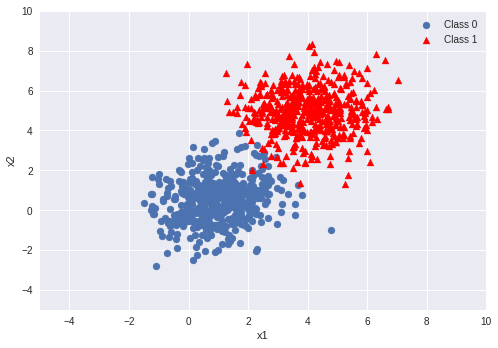

In [29]:
plt.figure(0)

# plot all rows with 1st column/feature as x-axis and 2nd column/feature as y-axis
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Create Training and Test Set

In [31]:
data = np.zeros((1000,3))  # create empty data matrix to store all the 100 data values
# here shape is 3 bcoz we will add 2features and y as 3rd column bcoz we don;t want to change the
# order while shuffeling. That's why we will join X and y in single data matrix
print(data.shape)

(1000, 3)


In [32]:
data[:500,:2] = dist_01 
data[500:,:2] = dist_02

data[500:,-1] = 1.0  # assign last column only for 2nd distribution as y=0 already for dist_01

In [34]:
# randomly shuffle the data now
np.random.shuffle(data)  
print(data[:10])

[[ 2.03232761  4.47148098  1.        ]
 [ 6.16275339  4.66629469  1.        ]
 [ 1.26771748  1.78594597  0.        ]
 [ 5.19502461  3.6279777   1.        ]
 [ 2.09176124  1.19844353  0.        ]
 [ 4.1747691   6.07272534  1.        ]
 [ 4.07908609  5.36364638  1.        ]
 [ 4.25918348  5.01965004  1.        ]
 [ 1.74268381 -1.62499282  0.        ]
 [ 4.79070089  6.44706938  1.        ]]


In [35]:
# Divide the data into Train and Test
split = int(0.8*data.shape[0])

X_train = data[:split,:-1]  # put all columns except last column upto 'split' in X_train
X_test = data[split:,:-1]   # put all columns except last column from 'split' upto last in X_test

Y_train = data[:split,-1] # put last column upto 'split' in Y_train
Y_test  = data[split:,-1] # put last column from 'split' upto last in Y_test

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


- One more step we need to add: 

### Data Normalization:

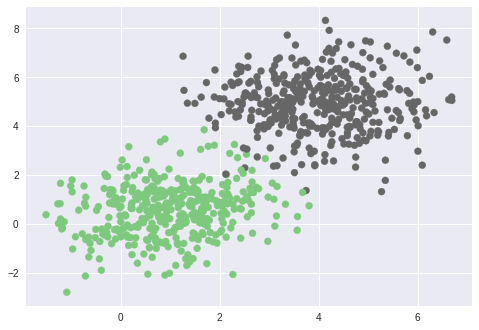

In [40]:
# Data Initially
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.Accent)
plt.show()

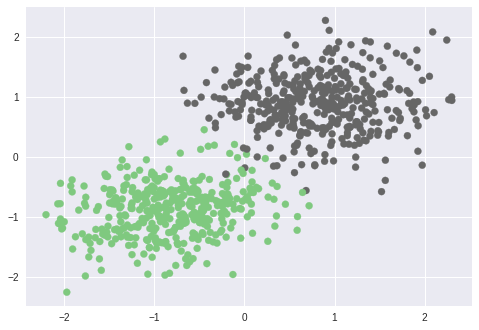

In [41]:
# Normalize the data

X_mean = X_train.mean(axis=0) # pass axis=0 to find rowise mean for all the columns/features
X_std = X_train.std(axis=0)

# Apply the transformation
X_train = (X_train-X_mean)/X_std

## Apply the same transformation on test data also
X_test = (X_test-X_mean)/X_std

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.Accent)
plt.show()

## Logistic Regression Implementation:

In [44]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def hypothesis(X, theta):
    ## X - entire array of size (m, n+1)
    ## theta - np.array(n+1,1)
    h = np.dot(X,theta)
    return sigmoid(h)

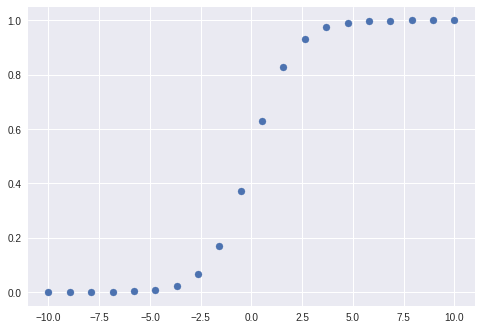

In [49]:
# we can also visualize sigmoid function
a = np.linspace(-10,10,20)  # to generate equally spaced 20 values between -10  and 10
# calculate the sigmoid function for these equally spaced points and plot them
plt.scatter(a, sigmoid(a))
plt.show()

- This S shaped curve is our sigmoid function.

In [51]:
def error(X, y, theta):
    ## X - (m,n+1)  and  y - (m,1)  and  theta - (n+1,1)
    hi = hypothesis(X,theta)
    e = -1*np.mean( y*np.log(hi) + (1-y)*np.log(1-hi) )
    
    return e

In [52]:
def gradient(X, y, theta):
    ## X - (m,n+1)  and  y - (m,1)  and  theta - (n+1,1)
    hi = hypothesis(X, theta)
    grad = np.dot(X.T, (y-hi))
    m = X.shape[0]
    return grad/m

def gradient_Descent(X, y, lr=0.1, max_iter=500):
    n = X.shape[1]
    theta = np.zeros((n,1)) # create empty theta vector of size n not n+1 bcoz n is already 
                            # updated to n+1 in the below cell 
    
    error_list = []  # create an empty list to store error
    
    for i in range(max_iter):
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        theta = theta + lr*grad
        
    return theta, error_list 

In [53]:
## Before prediction, we need to add x[0]=1 vector as 1st column at begining for bias term theta_0
ones = np.ones((X_train.shape[0],1)) # rows same as in X_train and one column
X_train = np.hstack((ones, X_train)) 
print(X_train)

Y_train = Y_train.reshape((-1,1))  # reshape y to 1column and no_of_rows will be aito-calculted 

[[ 1.         -0.25651015  0.70499242]
 [ 1.          2.00996883  0.7845311 ]
 [ 1.         -0.6760729  -0.39145977]
 ...
 [ 1.         -1.5454587  -0.28833685]
 [ 1.          0.28334202  0.60776654]
 [ 1.         -0.33251704  0.19353373]]


In [56]:
### Prediction:
theta, error_list = gradient_Descent(X_train, Y_train, lr=0.5)

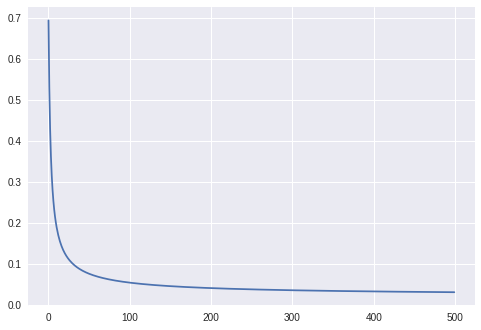

In [57]:
plt.plot(error_list)
plt.show()

## Whole Algo in a single cell:

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def hypothesis(X, theta):
    ## X - entire array of size (m, n+1)
    ## theta - np.array(n+1,1)
    h = np.dot(X,theta)
    return sigmoid(h)

def error(X, y, theta):
    ## X - (m,n+1)  and  y - (m,1)  and  theta - (n+1,1)
    hi = hypothesis(X,theta)
    e = -1*np.mean( y*np.log(hi) + (1-y)*np.log(1-hi) )
    
    return e

def gradient(X, y, theta):
    ## X - (m,n+1)  and  y - (m,1)  and  theta - (n+1,1)
    hi = hypothesis(X, theta)
    grad = np.dot(X.T, (y-hi))
    m = X.shape[0]
    return grad/m

def gradient_Descent(X, y, lr=0.1, max_iter=500):
    n = X.shape[1]
    theta = np.zeros((n,1)) # create empty theta vector of size n not n+1 bcoz n is already 
                            # updated to n+1 in the below cell 
    
    error_list = []  # create an empty list to store error
    
    for i in range(max_iter):
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        theta = theta + lr*grad
        
    return theta, error_list 

In [59]:
theta  # see what is our theta 

array([[-0.0570109 ],
       [ 3.41087534],
       [ 4.50144636]])

## Visualize Decision Surface:

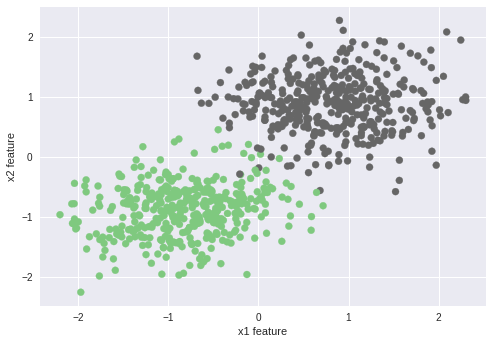

In [64]:
plt.scatter(X_train[:,1], X_train[:,2], c=Y_train.reshape((-1,)), cmap=plt.cm.Accent)
plt.xlabel("x1 feature")
plt.ylabel("x2 feature")
plt.show()

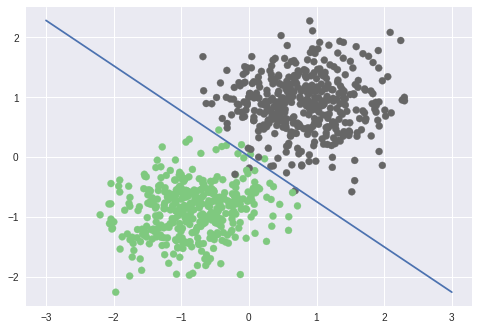

In [69]:
x1 = np.arange(-3,4)  # last value is excluded

x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2)  # to plot line differentiating data
# now plot data also:
plt.scatter(X_train[:,1], X_train[:,2], c=Y_train.reshape((-1,)), cmap=plt.cm.Accent)
plt.show()

## Predictions & Accuracy

In [73]:
X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
print(X_test[:5,:])

[[ 1.          2.4836063   1.55253528]
 [ 1.          0.20420341  0.44679101]
 [ 1.          1.18435584  0.80304863]
 [ 1.         -0.29196225 -0.70717527]
 [ 1.         -1.03054633 -1.42118174]]


In [94]:
def predict(X, theta):
    h = hypothesis(X, theta)  # it gives us the confidence score for class1(in range 0 to 1)
    output = np.zeros((h.shape)) # create empty array of same size as h to store output
    
    # put output=1 if h>0.5 else don't do anything bcoz it is already 0 otherwise.
    output[h>0.5] = 1
    output = output.astype('int')  # convert to integer type as it is in float by default
    return output

In [101]:
pred = predict(X_test, theta)
print(pred.shape, Y_test.shape)

(200, 1) (200,)


- pred is a vector. So we need to reshape pred to a list .

In [106]:
def accuracy(y_pred, y_actual):
    y_actual = y_actual.astype("int")  # convert it to int as it is in float by default
    acc = np.mean(y_pred == y_actual)
    return acc*100

accuracy(pred.reshape((-1,)), Y_test)  # convert pred into a list also as pred is a vector

100.0

In [105]:
train_pred = predict(X_train, theta)
print(accuracy(train_pred, Y_train))

99.125


## How to use sk-learn ?

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
model = LogisticRegression()

In [110]:
model.fit(X_train[:,1:], Y_train.reshape((-1,)))

LogisticRegression()

In [111]:
theta_0 = model.intercept_   # it stores the intercept or bias term
theta_s = model.coef_        # it stores theta[1] to theta[n]

print(theta_0, theta_s)

[-0.06058216] [[3.24226207 4.2614842 ]]


In [113]:
print(theta)  # this is theta predicted by our own algo

[[-0.0570109 ]
 [ 3.41087534]
 [ 4.50144636]]


In [118]:
model.score(X_train[:,1:], Y_train.reshape((-1,)))  # pass actual X_train and Y_train

0.99125

In [119]:
model.score(X_test[:,1:], Y_test)

1.0

- We can see, it also gives same accuracy as our model did.

In [121]:
## It gives us all the predictions
y_pred = model.predict(X_test[:,1:])
print(y_pred)

[1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1.]
